In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
%matplotlib inline

from subprocess import check_output

In [2]:
historical = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/AP%20Computer%20Science%20A%20Exam%20Dataset/historical.csv')
pass_ = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/AP%20Computer%20Science%20A%20Exam%20Dataset/pass_06_13.csv')

In [3]:
historical.head()

,state,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Pop
0,California,890,1981,2237,2664,2479,2396,2103,2095,2224,2151,2135,2193,2793,3101,3920,4964,38041430
1,Texas,825,1266,1743,2110,2191,1980,2099,2167,2411,2593,2951,3224,3392,3597,3614,3979,26059203
2,New York,802,1293,1429,1594,1677,1369,1366,1186,1141,1175,1050,1132,1460,1334,1821,1858,19570261
3,Virginia,365,733,677,838,636,640,591,535,646,888,859,913,1177,1203,1430,1655,8185867
4,Maryland,119,337,480,571,599,623,673,725,752,808,895,1038,1352,1330,1473,1629,5884563


In [4]:
historical.describe()

,1998,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Pop
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,120.294118,258.019608,299.117647,296.921569,277.000000,270.117647,263.27451,276.627451,284.882353,294.392157,314.921569,378.137255,414.490196,485.921569,579.509804,6.155177e+06
std,209.816996,446.989865,527.393616,516.397050,478.792439,465.261374,458.16565,490.588339,506.196865,537.558930,577.261045,664.874425,709.767437,811.841754,957.573295,6.974698e+06
min,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.00000,1.000000,0.000000,1.000000,1.000000,5.000000,0.000000,1.000000,0.000000,5.764120e+05
25%,11.500000,25.500000,26.500000,34.500000,24.000000,25.000000,31.00000,33.500000,28.500000,26.500000,24.000000,30.500000,45.000000,61.000000,59.000000,1.725570e+06
50%,38.000000,69.000000,77.000000,81.000000,69.000000,64.000000,73.00000,87.000000,80.000000,76.000000,78.000000,90.000000,113.000000,132.000000,174.000000,4.380415e+06
75%,133.000000,316.000000,342.500000,349.000000,337.500000,329.500000,297.00000,293.000000,274.000000,304.500000,327.500000,389.000000,425.500000,489.000000,637.000000,6.771578e+06
max,890.000000,2237.000000,2664.000000,2479.000000,2396.000000,2103.000000,2167.00000,2411.000000,2593.000000,2951.000000,3224.000000,3392.000000,3597.000000,3920.000000,4964.000000,3.804143e+07


In [6]:
pass_.head()

,state,year,schools_offering,total,passed,female,female_passed,black,black_passed,black_male,...,white,white_passed,white_male,white_female,asian,asian_passed,asian_male,asian_female,male,male_passed
0,National Data - CS A,2006,NaN,14108,8227,2495,1251,668,154,468,...,8240.0,5224.0,7081.0,1159.0,2846.0,1733.0,2178.0,668.0,NaN,NaN
1,National Data - CS A,2007,NaN,14529,8184,2665,1262,640,127,437,...,8516.0,5191.0,7333.0,1183.0,3319.0,1984.0,2474.0,845.0,NaN,NaN
2,National Data - CS A,2008,1778.0,15014,8537,2789,1450,673,167,454,...,8757.0,5359.0,7453.0,1304.0,3556.0,2169.0,2697.0,859.0,NaN,NaN
3,National Data - CS A,2009,1879.0,16061,9925,3096,1724,778,177,538,...,9064.0,6054.0,7725.0,1339.0,3979.0,2645.0,2963.0,1016.0,NaN,NaN
4,National Data - CS A,2010,2048.0,19390,12550,3726,2201,825,224,577,...,10556.0,7237.0,8938.0,1618.0,5131.0,3625.0,3842.0,1289.0,NaN,NaN


In [7]:
print(pass_.columns.tolist())

['state', 'year', 'schools_offering', 'total', 'passed', 'female', 'female_passed', 'black', 'black_passed', 'black_male', 'black_male_passed', 'black_female', 'black_female_passed', 'hispanic', 'hispanic_passed', 'hispanic_female', 'hispanic_female_passed', 'hispanic_male', 'hispanic_male_passed', 'white', 'white_passed', 'white_male', 'white_female', 'asian', 'asian_passed', 'asian_male', 'asian_female', 'male', 'male_passed']


In [8]:
total = pass_[['year','black','hispanic','white', 'asian']].groupby(['year']).agg(['sum'])
total = total[['black','hispanic','white','asian']].reset_index()
total.columns = total.columns.droplevel()
total.columns = ['year','black','hispanic','white','asian']

Text(0.5, 1.0, 'Participants in the AP Computer Science Exam by Race,1999-2013')

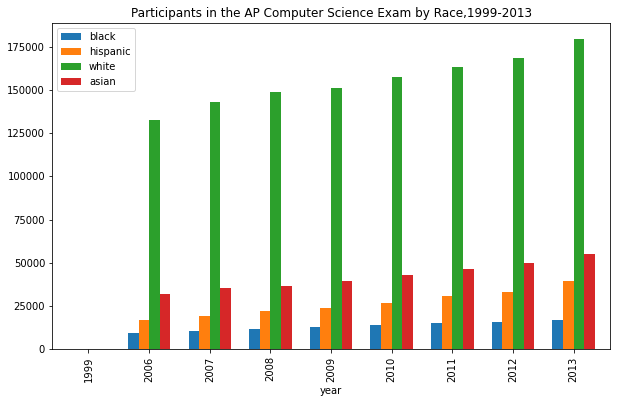

In [10]:
total.plot.bar(x = 'year',figsize=(10,6),linewidth=0.75,width=0.7)
plt.title('Participants in the AP Computer Science Exam by Race,1999-2013')

Text(0.5, 1.0, 'Pass Rate')

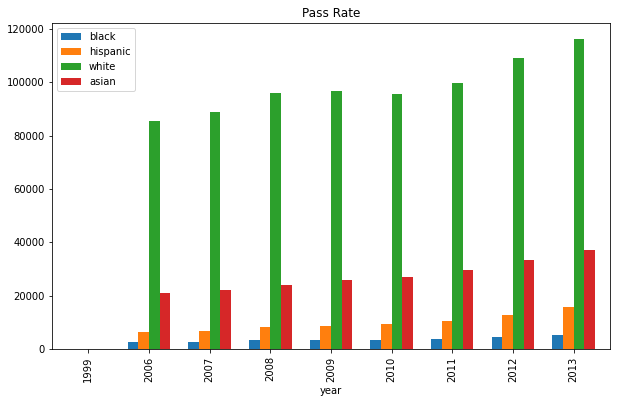

In [11]:
columns = ['year','black_passed', 'hispanic_passed',  'white_passed', 'asian_passed']
pass_copy = pass_[['year','black_passed', 'hispanic_passed',  'white_passed', 'asian_passed']].copy()
for col in columns:
    pass_copy[col] = pd.to_numeric(pass_copy[col],errors='coerce') 

pass_copy = pass_copy[['year','black_passed', 'hispanic_passed',  'white_passed', 'asian_passed']].fillna(0)
pass_rate = pass_copy[['year','black_passed', 'hispanic_passed',  'white_passed', 'asian_passed']].groupby(['year']).agg(['sum'])
pass_rate = pass_rate[['black_passed', 'hispanic_passed',  'white_passed', 'asian_passed']].reset_index()
pass_rate.columns = pass_rate.columns.droplevel()
pass_rate.columns = ['year','black','hispanic','white','asian']
pass_rate.plot.bar(x='year',figsize=(10,6),linewidth=0.75,width=0.7)
plt.title('Pass Rate')

Text(0.5, 1.0, 'Male vs Female')

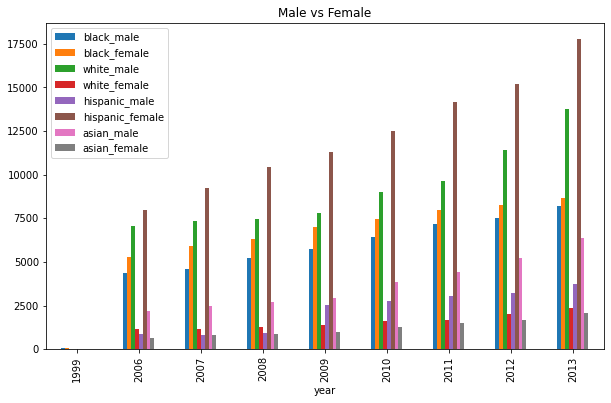

In [12]:
gender_pass = pass_[['year','black_male','black_female','white_male',
                     'white_female','hispanic_male','hispanic_female',
                     'asian_male','asian_female']].groupby(['year']).agg(['sum'])
gender_pass = gender_pass.reset_index()
gender_pass.columns = gender_pass.columns.droplevel()
gender_pass.columns = ['year','black_male','black_female','white_male',
                     'white_female','hispanic_male','hispanic_female',
                     'asian_male','asian_female']
gender_pass.plot.bar(x='year',figsize=(10,6),linewidth=0.8)
plt.title('Male vs Female')

In [ ]:
his